<a href="https://colab.research.google.com/github/vldslt/GBMATHSTAT/blob/main/%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B8%D0%B7_%D0%BE%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B5%D0%B3%D0%BE_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0%2C_%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B8%D1%82%D1%8C_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%B4%D0%BB%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D1%86%D0%B5%D0%BD_%D0%BD%D0%B0_%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C_(%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D1%8B)_%D0%A1_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BF%D0%BE%D0%BB%D1%83%D1%87%D0%B5%D0%BD%D0%BD%D0%BE%D0%B9_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%2C_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D1%8C_%D1%86%D0%B5%D0%BD%D1%8B_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80_%D0%B8%D0%B7_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B3%D0%BE_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.ensemble import GradientBoostingRegressor

In [244]:
DATA_TRAIN_PATH=pd.read_csv(
    "train.csv")
DATA_TEST_PATH=pd.read_csv(
    "test.csv")
data=DATA_TRAIN_PATH
X_test=DATA_TEST_PATH

In [245]:
df=data.copy()

In [246]:
df.DistrictId=df.DistrictId.astype('object')
df.Id=df.Id.astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

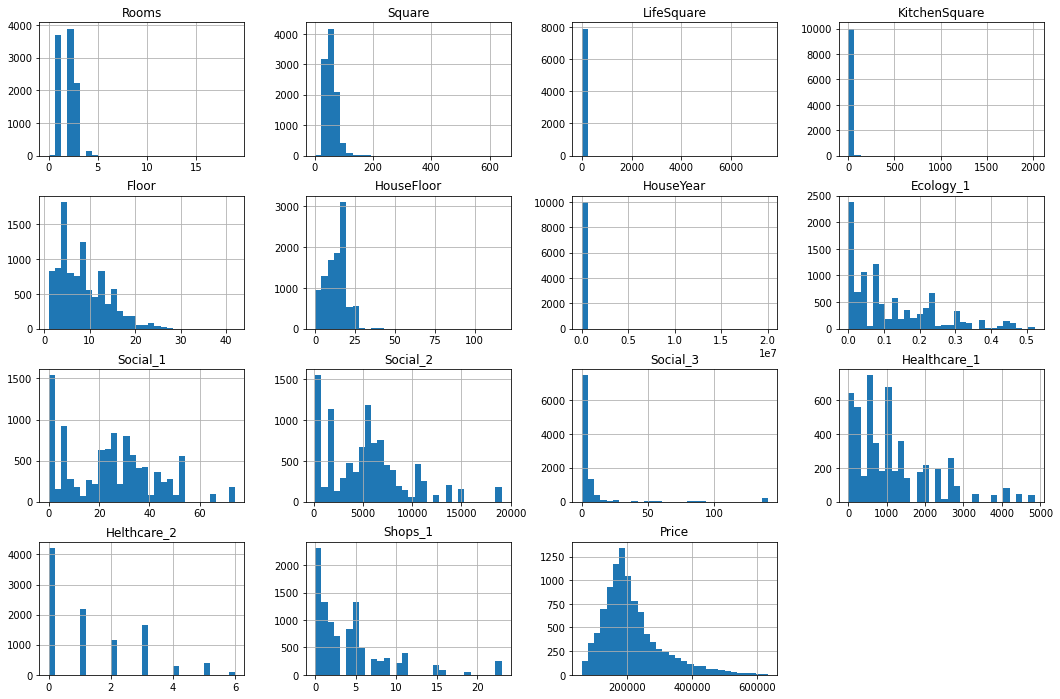

In [247]:
digital_features=df.select_dtypes(exclude=['object'])
digital_features.hist(figsize=(18,12), bins=30)
plt.show()

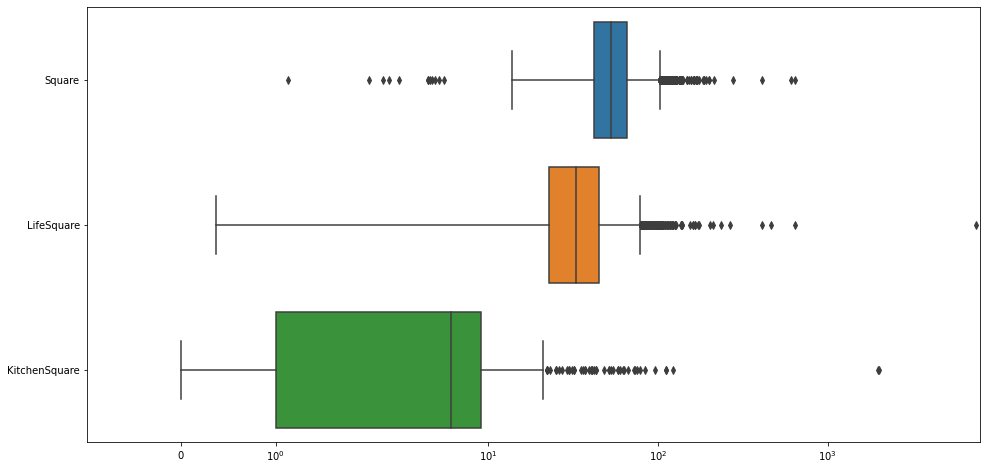

In [248]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[['Square', 'LifeSquare', 'KitchenSquare']], orient='h')
plt.xscale('symlog')
plt.xlim(left=-1)
plt.show()

In [249]:
df.insert(2,'SqMeterPrice', df.Price/df.Square)

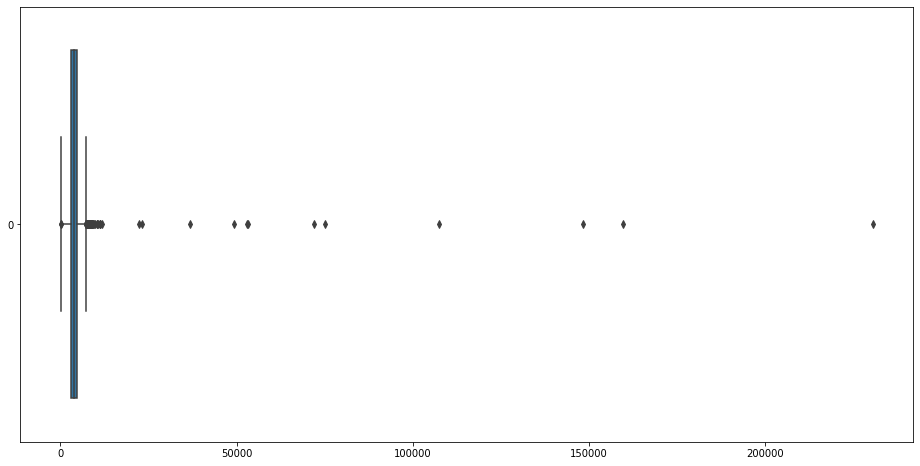

In [250]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df.SqMeterPrice, orient='h')
plt.show()

In [251]:
df.sort_values(by='Square', axis=0, ascending=True).head()

,Id,DistrictId,SqMeterPrice,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6392,14786,1,159593.107918,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8283,15744,34,230463.537966,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006
4853,3224,27,53253.578837,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
1608,10202,6,52996.529388,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
9294,6782,45,148259.792432,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,438005.182323


In [252]:
df.loc[(df.Square<1.3), 'Square']= df['Square']*100
df.loc[(df.Square<=13), 'Square']= df['Square']*10
df.loc[(df.Square>300), 'Square']= df['Square']/10

In [253]:
df.drop('SqMeterPrice', axis=1, inplace=True)
df.insert(2,'SqMeterPrice', df.Price/df.Square)

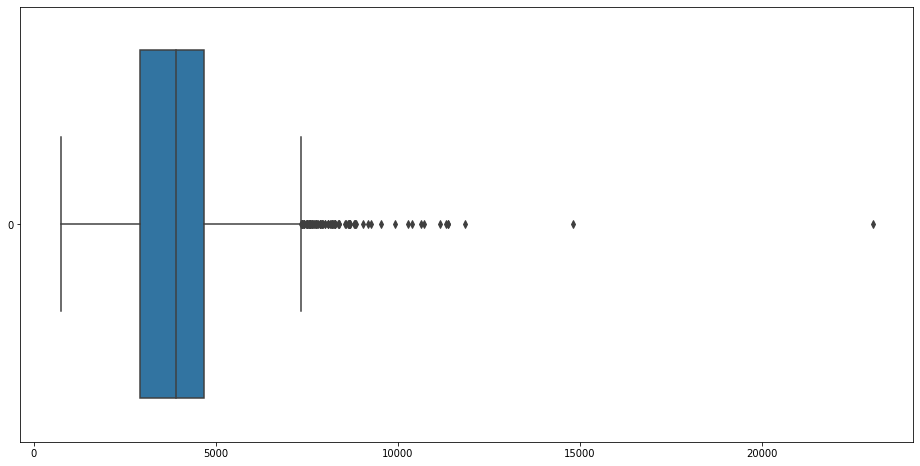

In [254]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df.SqMeterPrice, orient='h')
plt.show()

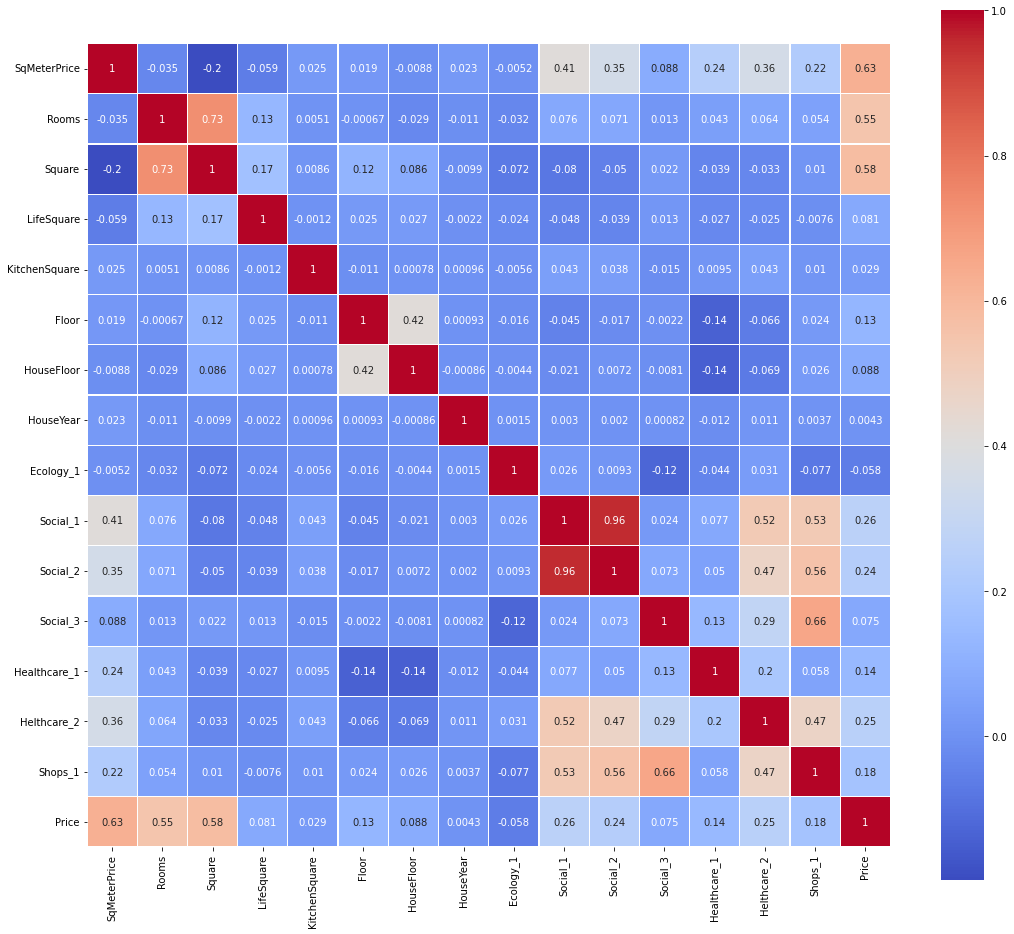

In [255]:
df_corr=df.corr()
plt.figure(figsize=(18,16))
sns.heatmap(df_corr, annot=True, linewidths=0.3, cmap='coolwarm', square=True)
plt.show()

In [256]:
df.Rooms.unique()

array([ 2.,  3.,  1.,  4., 10.,  0.,  5., 19.,  6.])

In [257]:
df[df.Rooms==0]

,Id,DistrictId,SqMeterPrice,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,1938.880408,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,1419.282909,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,2348.119347,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,4385.488771,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,2612.112170,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,5325.357884,0.0,23.772476,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,4108.784399,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,2498.580012,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [258]:
df.Rooms.mode()

0    2.0
dtype: float64

In [259]:
df.isnull().sum()

Id                  0
DistrictId          0
SqMeterPrice        0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [260]:
for feature in df.columns[10:-1]:
    print(f'Признак - {feature}\tУникальных значений - {df[feature].nunique()}.')

Признак - Ecology_1	Уникальных значений - 129.
Признак - Ecology_2	Уникальных значений - 2.
Признак - Ecology_3	Уникальных значений - 2.
Признак - Social_1	Уникальных значений - 51.
Признак - Social_2	Уникальных значений - 142.
Признак - Social_3	Уникальных значений - 30.
Признак - Healthcare_1	Уникальных значений - 79.
Признак - Helthcare_2	Уникальных значений - 7.
Признак - Shops_1	Уникальных значений - 16.
Признак - Shops_2	Уникальных значений - 2.


In [261]:
class FeaturesGenerator():
    
    def __init__(self):
        
        self.current_year=None
        self.cat_columns=None
        self.rsqm=None
        self.nsqm=None
        
        
    def fit(self,df):
        
        # Текущий год, для вычисления возраста дома
        
        self.current_year=datetime.datetime.now().year
        
        # Корректируем значения площадей, и количество комнат
        
        df.loc[(df.Square<1.3), 'Square']= df['Square']*100
        df.loc[(df.Square<=13), 'Square']= df['Square']*10
        df.loc[(df.Square>300), 'Square']= df['Square']/10
        df.loc[((df.Rooms>6)|(df.Rooms==0)), 'Rooms']=2
       
        
        # Добавляем стоимость кв.м для последующей агрегации данных в обучающей и тестовой выборках
        
        df.insert(1, 'SqMeterPrice',df['Price']/df['Square'])
        
        # Вычисляем на тесте среднюю стоимость кв.м в зависимости от к-ва комнат(для обработки пропусков в тестовом датасете),
        # и среднюю стоимость кв.м в зависимости от района и количества комнат
        
        self.rsqm=df.groupby(by=['Rooms'])['SqMeterPrice'].mean().rename('RoomSqMeterPrice', inplace=True)
        self.nsqm=df.groupby(by=['DistrictId','Rooms'])['SqMeterPrice'].mean().rename('DistSqMeterPrice', inplace=True) 
        
        # Удаляем лишнее
        
        df.drop('SqMeterPrice', axis=1, inplace=True)
        
        # Назначаем столбцы для последующего дамми-кодирования
        
        self.cat_columns=df.select_dtypes('object').columns
        
        
        
    def transform(self, df):
        
        # Заменяем год постройки дома на возраст дома(выбросы по году постройки предварительно исправляем на текущий год)
        
        df.loc[(df.HouseYear>self.current_year),'HouseYear']=self.current_year-1
        df.insert(df.columns.get_loc('HouseYear'), 'HousAge', self.current_year - df['HouseYear'])
        df.drop('HouseYear', axis=1, inplace=True)
       
        # Кодируем категориальные переменные
        
        df=pd.get_dummies(df, columns=self.cat_columns)
        
        # Корректируем значения площадей в тестовом датасете
        
        df.loc[(df.Square<1.3), 'Square']= df['Square']*100
        df.loc[(df.Square<=13), 'Square']= df['Square']*10
        df.loc[(df.Square>300), 'Square']= df['Square']/10
        
        # Корректируем количество комнат в тестовом датасете
        
        df.loc[((df.Rooms>6)|(df.Rooms==0)), 'Rooms']=2
                
        # Обрабатываем пропуски полях Healthcare_1 и LifeSquare, заполняя их методом 'pad'
        
        df=df.sort_values(by='DistrictId')
        df.Healthcare_1.fillna(method='pad',inplace=True)
        df=df.sort_values(by='Square')
        df.LifeSquare.fillna(method='pad',inplace=True)
        df.sort_index(inplace=True)
        
        # Добавляем поле DistSqMeterPrice содержащее среднюю стоимость кв.м в зависимости от района и количества комнат
        
        df=df.merge(self.rsqm, how='left', on='Rooms')
        df=df.merge(self.nsqm, how='left', on=['DistrictId', 'Rooms'])
        df.insert(1, 'DistSqMeterPrice', df.pop('DistSqMeterPrice'))
        
        # Заменяем пропуски, которые получились из-за того, что в тесте и трейне есть несовпадающие по Id районы,
        # на среднюю стоимость кв.м в зависимости от площади
        
        df.DistSqMeterPrice.fillna(df.RoomSqMeterPrice, inplace=True)
        
        # Удаляем лишнее
        
        df.drop('RoomSqMeterPrice', axis=1, inplace=True)
        
        # Переводим DistrictId, и Id в нечисловые признаки
        
        df['DistrictId']=df['DistrictId'].astype('object')
        df['Id']=df['Id'].astype('object')
        
        return df

In [262]:
generator=FeaturesGenerator()
generator.fit(data)
DF=generator.transform(data)
X_test=generator.transform(X_test)

In [263]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                10000 non-null  object 
 1   DistSqMeterPrice  10000 non-null  float64
 2   DistrictId        10000 non-null  object 
 3   Rooms             10000 non-null  float64
 4   Square            10000 non-null  float64
 5   LifeSquare        10000 non-null  float64
 6   KitchenSquare     10000 non-null  float64
 7   Floor             10000 non-null  int64  
 8   HouseFloor        10000 non-null  float64
 9   HousAge           10000 non-null  int64  
 10  Ecology_1         10000 non-null  float64
 11  Social_1          10000 non-null  int64  
 12  Social_2          10000 non-null  int64  
 13  Social_3          10000 non-null  int64  
 14  Healthcare_1      10000 non-null  float64
 15  Helthcare_2       10000 non-null  int64  
 16  Shops_1           10000 non-null  int64  

In [264]:
DF.shape, X_test.shape

((10000, 24), (5000, 23))

In [266]:
y_train=DF.Price
X_train=DF.drop(['Id','Price'], axis=1)
# Столбец 'Id' из тестовых данных сохраним, он будет нужен для файла с результатом
test_idx=X_test.pop('Id')

In [267]:
X_train.shape, X_test.shape, y_train.shape

((10000, 22), (5000, 22), (10000,))

In [268]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(learning_rate=0.002, max_depth=20, max_features=0.005, n_estimators=1000, random_state=15 )
model.fit(X_train, y_train)
pred=model.predict(X_test)

In [269]:
model.score(X_train,y_train)

0.9761636188058493

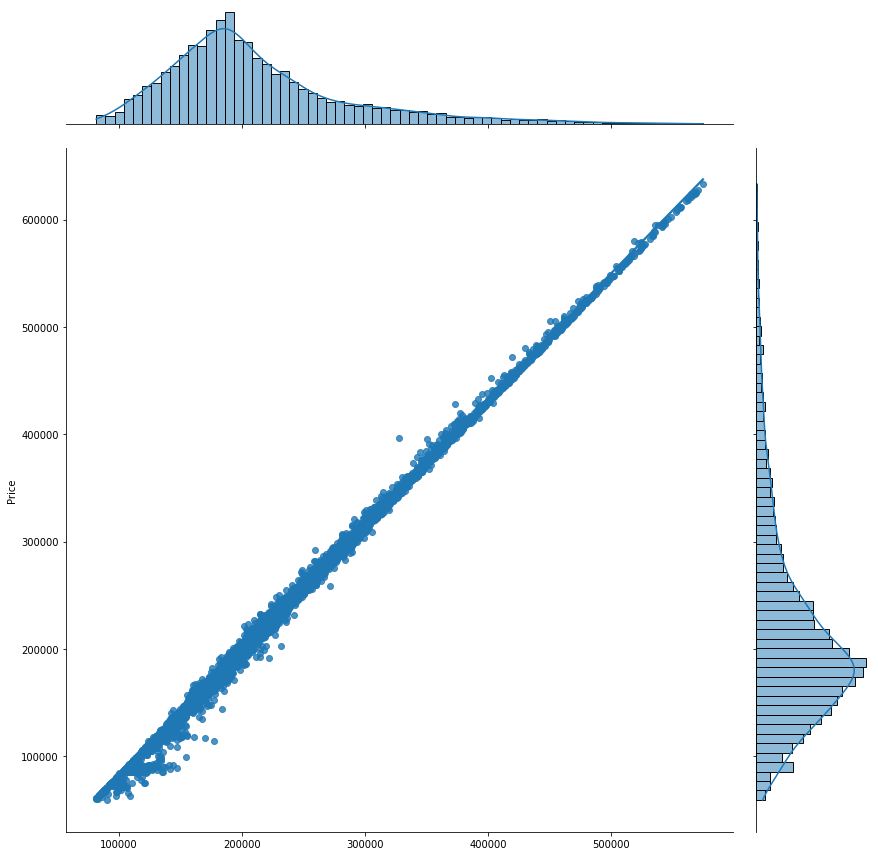

In [270]:
sns.jointplot(x=model.predict(X_train), y=y_train, kind='reg', height=12)
plt.show()

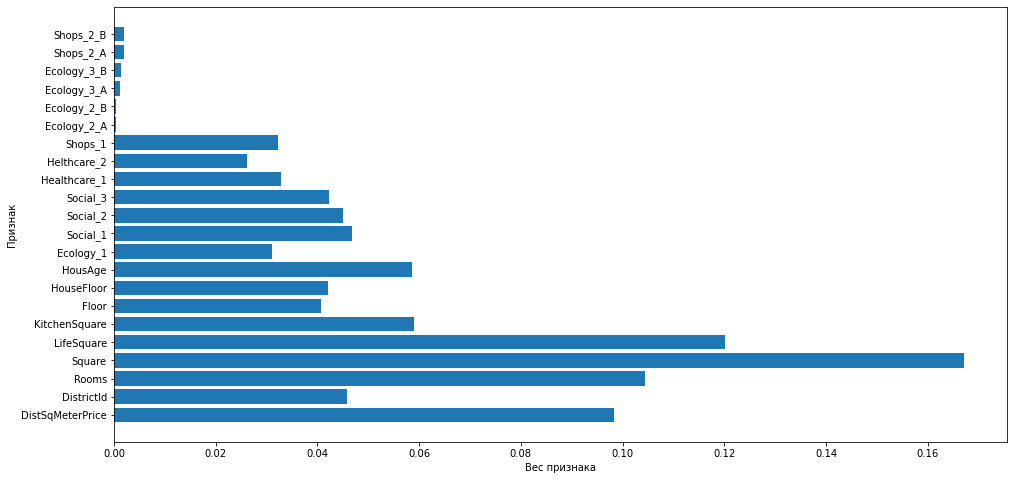

In [271]:
plt.figure(figsize=(16,8))
plt.barh(X_train.columns.tolist(), model.feature_importances_)
plt.xlabel('Вес признака')
plt.ylabel('Признак')
plt.show()

In [272]:
result=pd.DataFrame({'Id':test_idx, 'Price':pred})
result.head()

,Id,Price
0,725,163238.453967
1,15856,230493.804503
2,5480,234359.263414
3,15664,289881.767998
4,14275,153277.315458


In [273]:
result.to_csv(RESULT_PATH, index=False)

ValueError: ignored